# Focus: Concave Points

In [1]:
import kagglehub
import pandas as pd # to work with dataframes, manipulate data (panel data)
import matplotlib.pyplot as plt # viz library
import seaborn as sns # HD viz library
import numpy as np # to work with numbers (numerical python)
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy.stats import pearsonr

%matplotlib inline
pd.set_option('display.max_columns', None)

data = pd.read_csv(r'cleaned_data.csv')
df = data.copy()


c:\ProgramData\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Specifying only concave_points related columns

In [2]:
df_concave_points = df[['id', 'diagnosis','concave points_mean', 'concave points_se', 'concave points_worst' ]]

### Defining a new value column

Idea: Add a new value for the difference between mean concave_points and concave_points at worst to explore possible correlation focusing the change of size

In [3]:
# defining a new measure for the difference between the mean and the worst concave_points
df_concave_points = df_concave_points.assign( concave_points_diff = lambda x: (x['concave points_worst'] - x['concave points_mean'] ))
df_concave_points

,id,diagnosis,concave points_mean,concave points_se,concave points_worst,concave_points_diff
0,842302,M,0.14710,0.01587,0.2654,0.11830
1,842517,M,0.07017,0.01340,0.1860,0.11583
2,84300903,M,0.12790,0.02058,0.2430,0.11510
3,84348301,M,0.10520,0.01867,0.2575,0.15230
4,84358402,M,0.10430,0.01885,0.1625,0.05820
...,...,...,...,...,...,...
564,926424,M,0.13890,0.02454,0.2216,0.08270
565,926682,M,0.09791,0.01678,0.1628,0.06489
566,926954,M,0.05302,0.01557,0.1418,0.08878
567,927241,M,0.15200,0.01664,0.2650,0.11300


In [4]:
# filtering the DataFrame by diagnosis
df_M = df_concave_points[df_concave_points['diagnosis'] == 'M']
df_B = df_concave_points[df_concave_points['diagnosis'] == 'B']

Variable for plots

In [5]:
# concave_points variables to analyze
concave_points_vars = ['concave points_mean', 'concave points_se', 'concave points_worst', 'concave_points_diff']

### concave_points histograms and overview

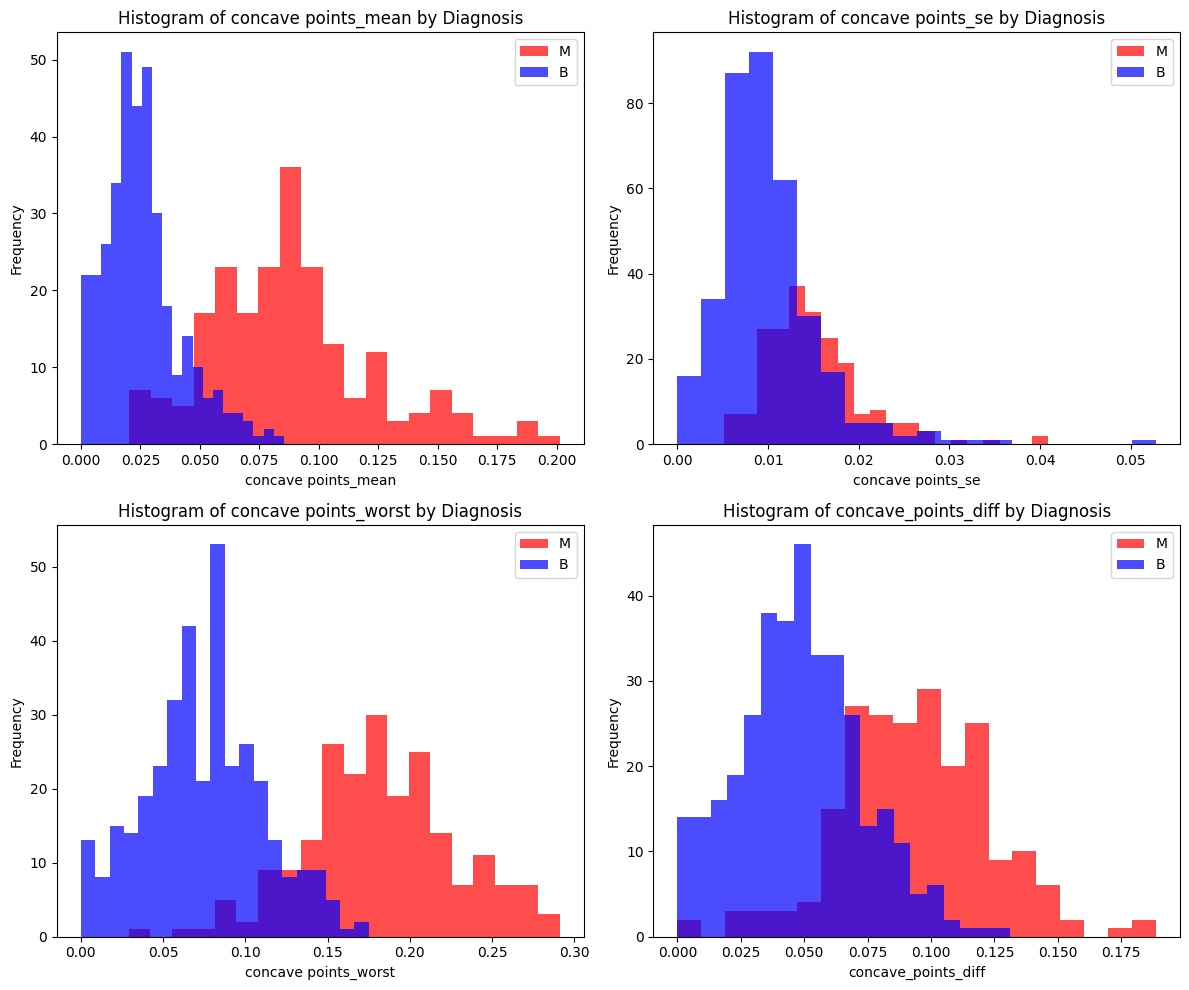

In [6]:
# 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# loop through each concave_points variable and plot overlapping histograms for "M" and "B"
for i, var in enumerate(concave_points_vars):
    ax = axes[i // 2, i % 2]
    # filtering data by diagnosis
    data_M = df_concave_points[df_concave_points['diagnosis'] == 'M'][var]
    data_B = df_concave_points[df_concave_points['diagnosis'] == 'B'][var]
    
    # plot overlapping histograms with same style and colors:
    # diagnosis M in red and diagnosis B in blue, with alpha=0.7
    ax.hist(data_M, bins=20, alpha=0.7, label='M', color='red')
    ax.hist(data_B, bins=20, alpha=0.7, label='B', color='blue')
    
    ax.set_title(f"Histogram of {var} by Diagnosis")
    ax.set_xlabel(var)
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.savefig('plots/histo_concave_points.png')
plt.show()


### Closer look at the overlapping regions

C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_31504\3987924716.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_overlap.groupby(var + '_bin')['diagnosis'].count()
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_31504\3987924716.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_cancer = df_overlap.groupby(var + '_bin')['diagnosis'].apply(lambda x: (x == 'M').sum() / len(x))
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_31504\3987924716.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain

concave points_mean_bin
(0.019299999999999998, 0.0268]    0.027027
(0.0268, 0.0333]                  0.119403
(0.0333, 0.0398]                  0.096774
(0.0398, 0.0463]                  0.173913
(0.0463, 0.0528]                  0.428571
(0.0528, 0.0593]                  0.625000
(0.0593, 0.0658]                  0.692308
(0.0658, 0.0723]                  0.705882
(0.0723, 0.0788]                  0.812500
(0.0788, 0.0853]                  0.950000
Name: diagnosis, dtype: float64
concave points_se_bin
(0.00417, 0.00875]    0.102190
(0.00875, 0.0123]     0.348387
(0.0123, 0.0159]      0.576271
(0.0159, 0.0195]      0.698413
(0.0195, 0.023]       0.681818
(0.023, 0.0266]       0.769231
(0.0266, 0.0302]      0.428571
(0.0302, 0.0338]      0.500000
(0.0338, 0.0373]      0.500000
(0.0373, 0.0409]      1.000000
Name: diagnosis, dtype: float64
concave points_worst_bin
(0.028, 0.0436]     0.035714
(0.0436, 0.0582]    0.000000
(0.0582, 0.0728]    0.033333
(0.0728, 0.0874]    0.042254
(0.0874, 

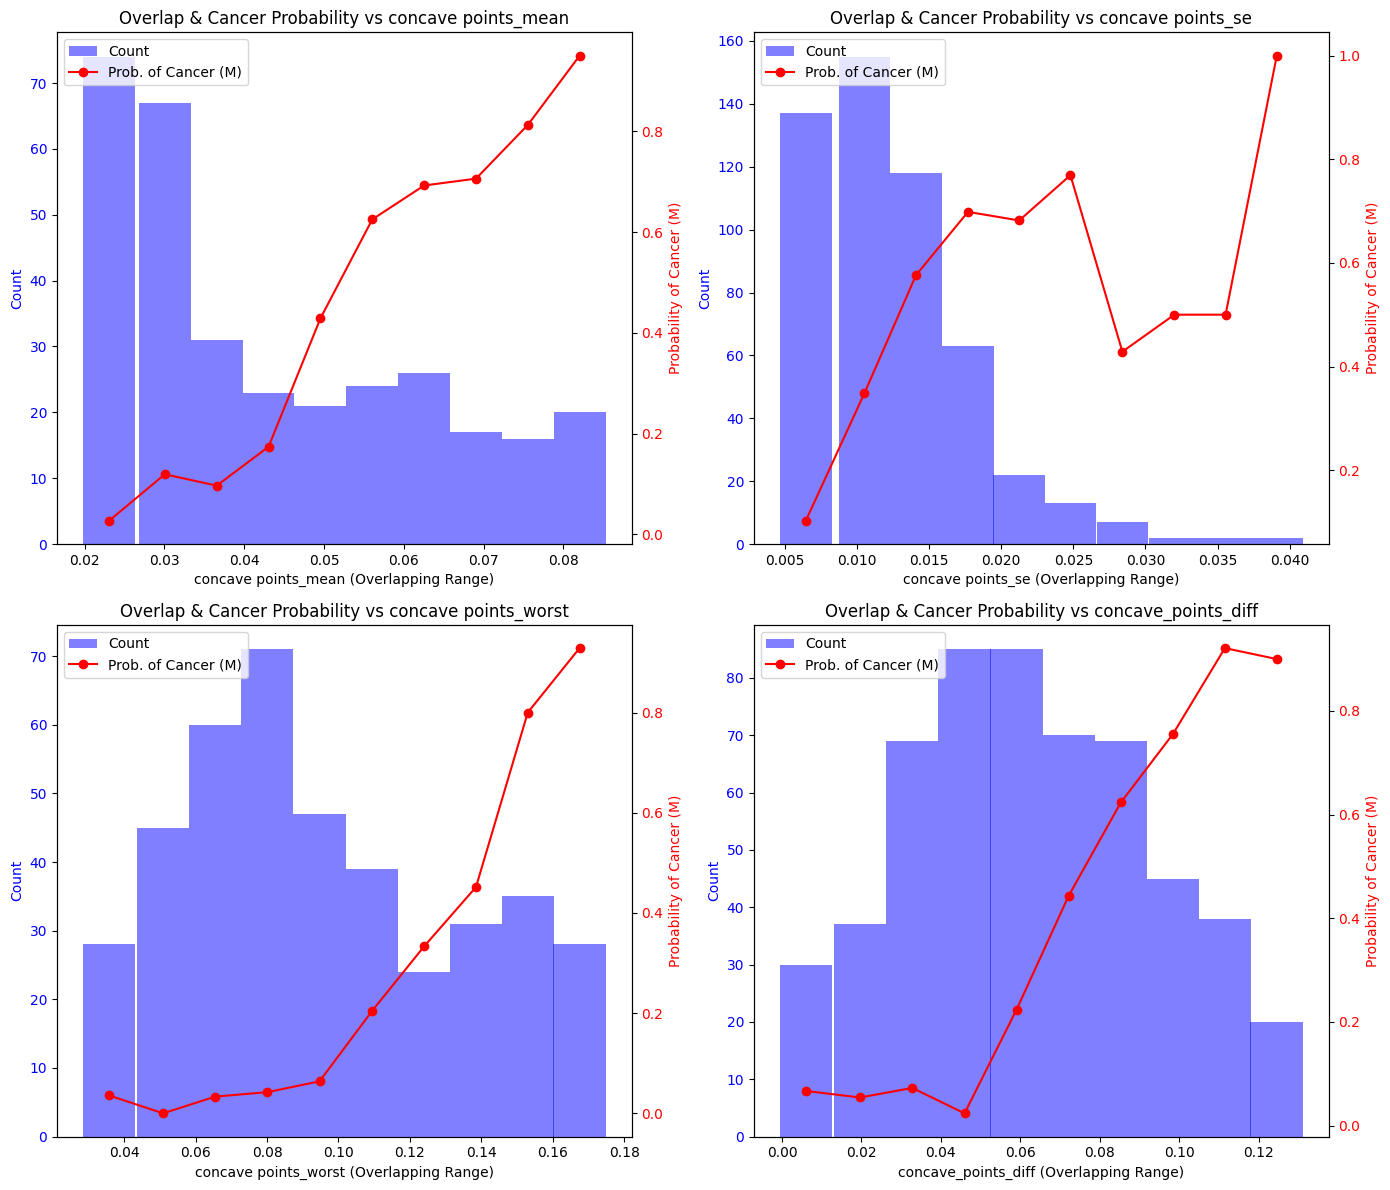

In [7]:
#  2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# loop over each concave_points variable
for i, var in enumerate(concave_points_vars):
    
    # determine the overlapping range for the variable
    min_overlap = max(df_M[var].min(), df_B[var].min())
    max_overlap = min(df_M[var].max(), df_B[var].max())
    
    # filter the DataFrame to the overlapping region
    df_overlap = df_concave_points[(df_concave_points[var] >= min_overlap) & (df_concave_points[var] <= max_overlap)].copy()
    
    # create 10 evenly spaced bins in the overlapping range
    bins = np.linspace(min_overlap, max_overlap, 11)
    df_overlap[var + '_bin'] = pd.cut(df_overlap[var], bins=bins, include_lowest=True)
    
    # calculate counts for each bin and the probability of diagnosis "M"
    bin_counts = df_overlap.groupby(var + '_bin')['diagnosis'].count()
    prob_cancer = df_overlap.groupby(var + '_bin')['diagnosis'].apply(lambda x: (x == 'M').sum() / len(x))
    print(prob_cancer)

    # calculate bin centers and bin width
    bin_centers = [interval.mid for interval in bin_counts.index.categories]
    bin_width = bins[1] - bins[0]
    
    # plot on the current subplot
    ax = axes[i]
    # histogram (bar chart) for counts on primary y-axis (blue)
    ax.bar(bin_centers, bin_counts, width=bin_width, alpha=0.5, color='blue', label='Count')
    ax.set_xlabel(f"{var} (Overlapping Range)")
    ax.set_ylabel("Count", color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_title(f"Overlap & Cancer Probability vs {var}")
    
    # create a secondary y-axis for the probability curve (red)
    ax2 = ax.twinx()
    ax2.plot(bin_centers, prob_cancer.values, marker='o', linestyle='-', color='red', label='Prob. of Cancer (M)')
    ax2.set_ylabel("Probability of Cancer (M)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('plots/histo_overlap_concave_points.png')
plt.show()


### Boxplot overview of 4 concave_points metrics

C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_31504\805419591.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=var, data=df_concave_points,
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_31504\805419591.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=var, data=df_concave_points,
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_31504\805419591.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=var, data=df_concave_points,
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_31504\805419591.py:8: Fut

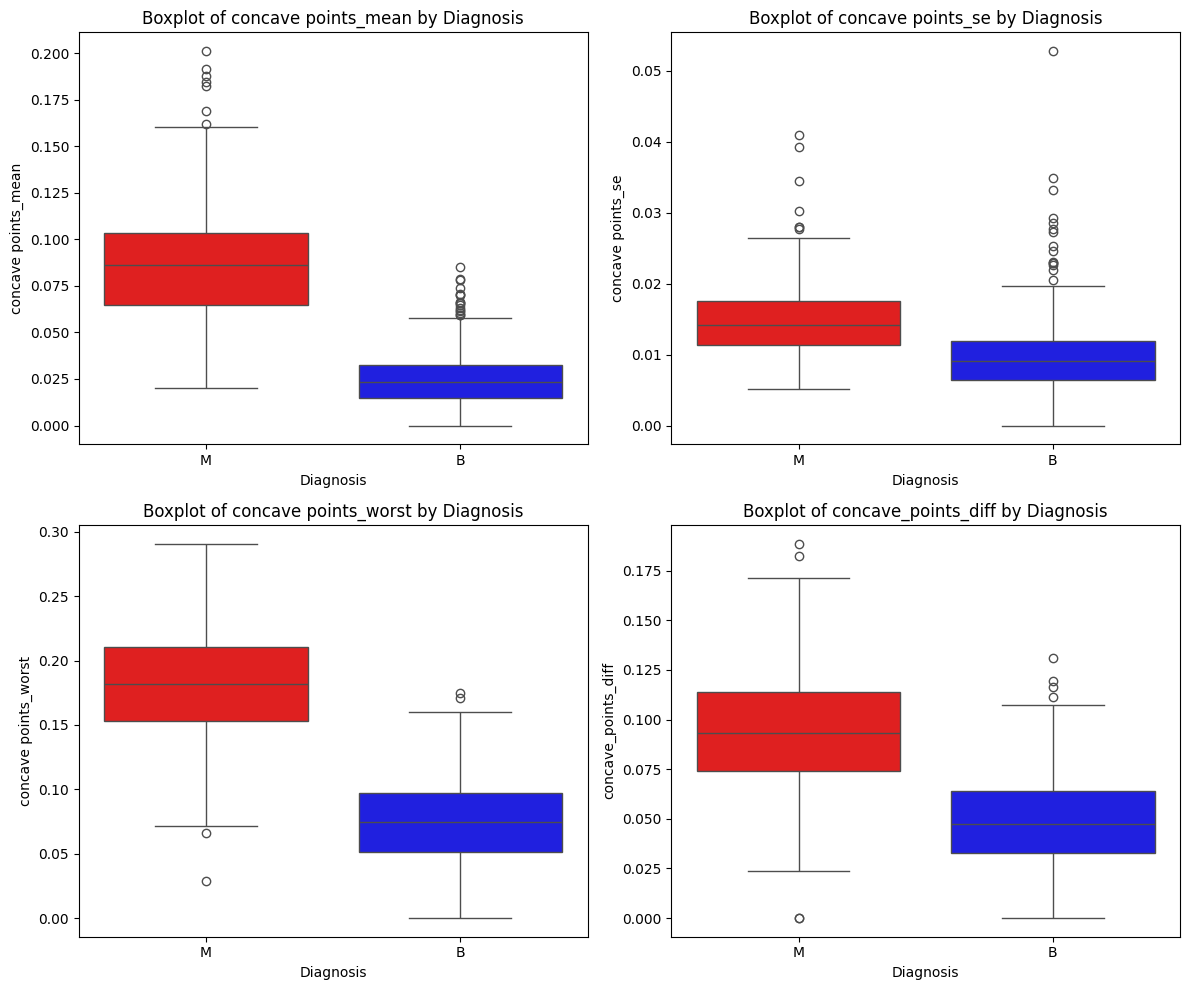

In [8]:
# create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # flatten the axes array so each element is an Axes instance

# loop over each variable and generate a boxplot
for i, var in enumerate(concave_points_vars):
    ax = axes[i]
    sns.boxplot(x='diagnosis', y=var, data=df_concave_points,
                palette={'M': 'red', 'B': 'blue'}, ax=ax)
    ax.set_title(f"Boxplot of {var} by Diagnosis")
    ax.set_xlabel("Diagnosis")
    ax.set_ylabel(var)

plt.tight_layout()
plt.savefig('plots/boxplt_concave_points.png')
plt.show()


### Pearson's correlation for concave_points_mean, concave_points_se, concave_points_worst and concave_points_diff with diagnosis

In [9]:
df_concave_points['diagnosis_numeric'] = df_concave_points['diagnosis'].map({'B': 0, 'M': 1})

# dictionary for correlation results
results = {}

for col in concave_points_vars:
    r, p = pearsonr(df_concave_points['diagnosis_numeric'], df_concave_points[col])
    results[col] = {'p-value': p, 'r-Pearson': r}

results_df = pd.DataFrame(results).T
print(results_df)


                            p-value  r-Pearson
concave points_mean   7.101150e-116   0.776614
concave points_se      3.072309e-24   0.408042
concave points_worst  1.969100e-124   0.793566
concave_points_diff    5.681090e-67   0.640311


concave_points mean and max(_worst) show the closest to 0 values, indicating strong correlation

### Chi-Square for the overlapping region for diagnosis and Concave points at worst

Let's pick the concave points metric with the smallest p-value and calculate its Chi-Square p-value.

Since the concave points is a continues numeric data, first converting it into discrete values within the overlapping region using binning technique and then calculating p-value of Chi-Square

In [10]:
# Determine overlapping range
min_overlap = max(df_M['concave points_worst'].min(), df_B['concave points_worst'].min())
max_overlap = min(df_M['concave points_worst'].max(), df_B['concave points_worst'].max())

df_overlap = df_concave_points[(df_concave_points['concave points_worst'] >= min_overlap) & (df_concave_points['concave points_worst'] <= max_overlap)]

# Create bins for the overlapping region (10 bins)
bins = np.linspace(min_overlap, max_overlap, 11)
df_overlap = df_overlap.copy()  # avoid SettingWithCopyWarning
df_overlap['concave_points_bin'] = pd.cut(df_overlap['concave points_worst'], bins=bins, include_lowest=True)


contingency_table = pd.crosstab(df_overlap['concave_points_bin'], df_overlap['diagnosis'])
print(contingency_table)


_,pvalue, _, _ = chi2_contingency(contingency_table)
cramer_v = association(contingency_table, method='cramer')
print(f'Chi-Square p-value is: {pvalue}\nCramer V is: {cramer_v}')


diagnosis            B   M
concave_points_bin        
(0.028, 0.0436]     27   1
(0.0436, 0.0582]    45   0
(0.0582, 0.0728]    58   2
(0.0728, 0.0874]    68   3
(0.0874, 0.102]     44   3
(0.102, 0.117]      31   8
(0.117, 0.131]      16   8
(0.131, 0.146]      17  14
(0.146, 0.16]        7  28
(0.16, 0.175]        2  26
Chi-Square p-value is: 1.235542576364234e-39
Cramer V is: 0.7119599662792855


this extremely small p-value allows us to reject the null hypothesis of independence with high confidence. It shows that there is a statistically significant association between the compactness bins and the diagnosis (B vs. M). This means that the distribution of benign ("B") and malignant ("M") cases across the concave points is not due to random chance, and the metric compactness appears to have a strong relationship with the diagnosis outcome.